# Домашнее задание №3

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [195]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head(15)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [28]:
clear_data = data.dropna()
len(clear_data)

579

In [37]:
from sklearn.linear_model import LinearRegression
direct_bilirubin = clear_data['Direct_Bilirubin']
total_bilirubin = clear_data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct_bilirubin).reshape(-1,1), total_bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.4263057597486335
slope: [1.93361341]


## total_bilirubin = 1.93 * direct_bilirubin + 0.43

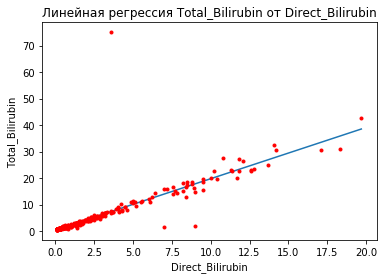

In [38]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия Total_Bilirubin от Direct_Bilirubin')
x = np.linspace(min(direct_bilirubin), max(direct_bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct_bilirubin, total_bilirubin, 'r.')
plt.show()

In [39]:
model.predict(np.array([4]).reshape(-1, 1))

array([8.16075942])

In [40]:
clear_data[(clear_data['Direct_Bilirubin'] >= 3.9) & (clear_data['Direct_Bilirubin'] <= 4.1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
92,60,Male,8.6,4.0,298,412,850,7.4,3.0,0.60,1
155,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
169,60,Male,8.9,4.0,950,33,32,6.8,3.1,0.80,1
419,55,Female,8.2,3.9,1350,52,65,6.7,2.9,0.70,1
569,16,Male,7.7,4.1,268,213,168,7.1,4.0,1.20,1


## Максимальная ошибка приблизительно 0.54

In [41]:
model.predict(np.array([5]).reshape(-1, 1))

array([10.09437283])

In [42]:
clear_data[(clear_data['Direct_Bilirubin'] >= 4.9) & (clear_data['Direct_Bilirubin'] <= 5.1)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
160,60,Male,11.0,4.9,750,140,350,5.5,2.1,0.6,1
161,60,Male,11.5,5.0,1050,99,187,6.2,2.8,0.8,1
178,75,Male,10.6,5.0,562,37,29,5.1,1.8,0.5,1
420,55,Female,10.9,5.1,1350,48,57,6.4,2.3,0.5,1


## Максимальная ошибка приблизительно 1.41 для Direct_Bilirubin = 5

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

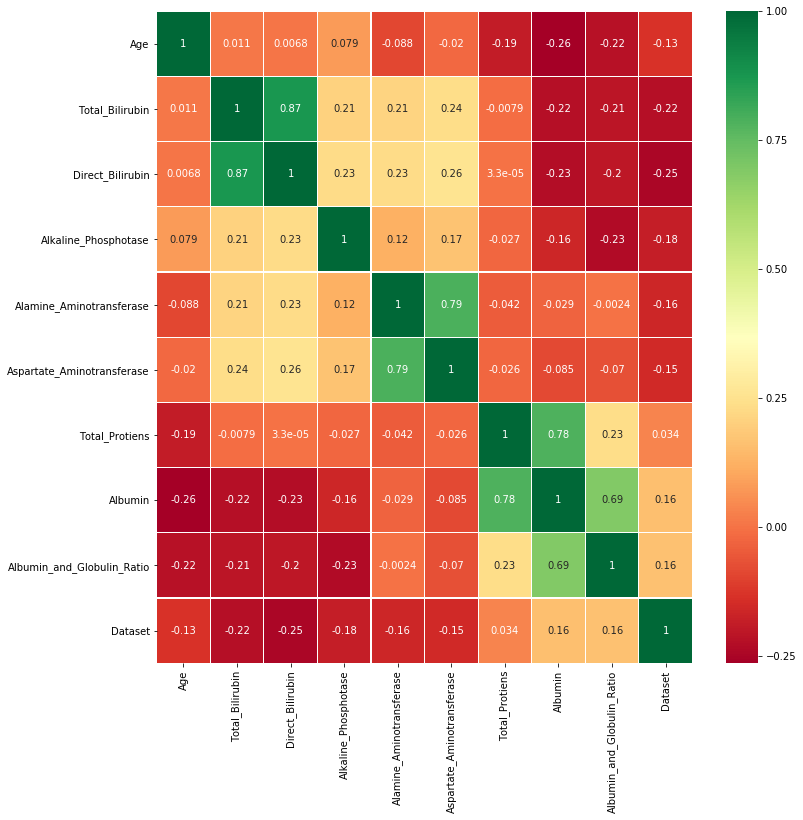

In [43]:
sns.heatmap(clear_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

## Для построения модели многомерной регрессии по 2 параметрам возьмем показатель Direct bilirubin и Albumin как № 3 по величине корреляции, Total bilirubin брать не будем, так как он практически линейно зависит от direct bilirubin и это не даст дополнительной информации

In [121]:
direct_bilirubin = clear_data['Direct_Bilirubin']
alkaline = clear_data['Alkaline_Phosphotase']
result = clear_data['Dataset']
x = np.vstack([np.array(direct_bilirubin), np.array(alkaline)]).T
y = np.array(result)
model = LinearRegression().fit(x, y)
x

array([[1.00e-01, 1.87e+02],
       [5.50e+00, 6.99e+02],
       [4.10e+00, 4.90e+02],
       ...,
       [2.00e-01, 2.45e+02],
       [5.00e-01, 1.84e+02],
       [3.00e-01, 2.16e+02]])

In [119]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.408430024914044
slope: [-0.03451138 -0.00024674]


In [123]:
print('Предсказание модели: ', model.predict(x[0:15]))

Предсказание модели:  [1.35883861 1.04614657 1.14603105 1.34971889 1.29129308 1.33295026
 1.36352987 1.34823524 1.34823524 1.32997331 1.3531636  1.29941298
 1.32158738 1.34182323 1.36575053]


## По предсказаниям этой модели нельзя сделать достоверный вывод о болезни пациента 10 и 13 значение должны быть 2, но они практически не отличаются от соседних значений 

Посчитать квартили для всех колонок. 

In [148]:
clear_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

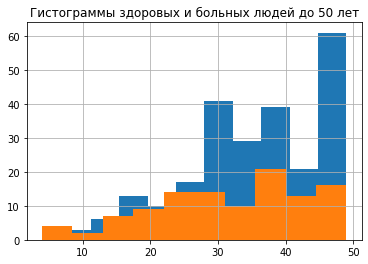

In [196]:
healthy_under_50 = clear_data[(clear_data['Dataset'] == 1) & (clear_data['Age'] < 50)]
ill_under_50 = clear_data[(clear_data['Dataset'] == 2) & (clear_data['Age'] < 50)]
plt.title('Гистограммы здоровых и больных людей до 50 лет')
healthy_under_50['Age'].hist()
ill_under_50['Age'].hist()

In [169]:
healthy_under_50['Age'].mean()

35.31666666666667

In [171]:
np.quantile(healthy_under_50['Age'], .50)

37.0

In [175]:
ill_under_50['Age'].mean()

31.663636363636364

In [176]:
np.quantile(ill_under_50['Age'], .50)

34.0

## Различия в среднем и 50% квантилем (среднее меньше Q2) в выборках дают представление о том что распределение в выборках смещено вправо относительно нормального распределения, что видно и по гистограмме

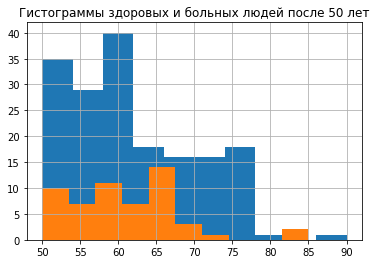

In [197]:
healthy_over_50 = clear_data[(clear_data['Dataset'] == 1) & (clear_data['Age'] >= 50)]
ill_over_50 = clear_data[(clear_data['Dataset'] == 2) & (clear_data['Age'] >= 50)]
plt.title('Гистограммы здоровых и больных людей после 50 лет')
healthy_over_50['Age'].hist()
ill_over_50['Age'].hist()

In [170]:
healthy_over_50['Age'].mean()

61.08045977011494

In [172]:
np.quantile(healthy_over_50['Age'], .50)

60.0

In [173]:
ill_over_50['Age'].mean()

60.763636363636365

In [174]:
np.quantile(ill_over_50['Age'], .50)

60.0

## Небольшое различие в среднем и 50% квантиле (среднее больше Q2)в выборках дают представление о том что распределение в выборках смещено влево относительно нормального распределения


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [185]:
total_bilirubin_for_ill = clear_data[clear_data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(total_bilirubin_for_ill, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.404567365174238, pvalue=4.134672753064473e-63)

## pvalue практически 0 поэтому мы отвергаем нулевую гипотезу и можем сказать, что имеется статистическое различие между значением total bilirubin у больных людей и генеральной совокупности в целом.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [186]:
total_bilirubin_for_healthy = clear_data[clear_data['Dataset']==1]['Total_Bilirubin']
stats.ttest_ind(total_bilirubin_for_ill, total_bilirubin_for_healthy)

Ttest_indResult(statistic=-5.422946004172417, pvalue=8.632557516910643e-08)

## по значению p-value << 0.05 можно сказать что данные группы статистически непохожи

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [193]:
young = clear_data[clear_data['Age'] <= 30]['Dataset']
middle = clear_data[(clear_data['Age'] >= 30) & (clear_data['Age'] > 55)]['Dataset']
old = clear_data[clear_data['Age'] >= 55]['Dataset']
stats.ttest_ind(old, middle)

Ttest_indResult(statistic=-0.19829176146921534, pvalue=0.8429381608114088)

In [194]:
stats.f_oneway(young, middle, old)

F_onewayResult(statistic=7.0286734287877755, pvalue=0.0009878881471361745)

## Выборки для среднего и  старшего возраста похожи между собой, но если сравнивать выборки для 3-х групп возрастов - они непохожи.

Вопросы задавать на почту yustiks@gmail.com